In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imarpitm","key":"576105ef0463277a23bac6e757d960c9"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats --force
!unzip -q dogs-vs-cats.zip -d dogs_and_cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:08<00:00, 172MB/s]
100% 1.06G/1.06G [00:08<00:00, 128MB/s]


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [5]:
base_dir = "dogs_and_cats/train"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 543s 1s/step - accuracy: 0.5269 - loss: 0.7253 - val_accuracy: 0.6043 - val_loss: 0.6580
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 546s 1s/step - accuracy: 0.6185 - loss: 0.6555 - val_accuracy: 0.6802 - val_loss: 0.6031
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 557s 1s/step - accuracy: 0.6622 - loss: 0.6152 - val_accuracy: 0.7000 - val_loss: 0.5819
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 573s 1s/step - accuracy: 0.7101 - loss: 0.5680 - val_accuracy: 0.7548 - val_loss: 0.5046
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 527s 1s/step - accuracy: 0.7510 - loss: 0.5133 - val_accuracy: 0.7742 - val_loss: 0.4916
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 550s 1s/step - accuracy: 0.7609 - loss: 0.4894 - val_accuracy: 0.7860 - val_loss: 0.4660
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 509s 1s/step - accuracy: 0.7828 - loss: 0.4663 - val_accuracy: 0.7883 - val_loss: 0.4504
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 563s 1s/step - accuracy: 0.7903 - loss: 0.4512 - val_accu

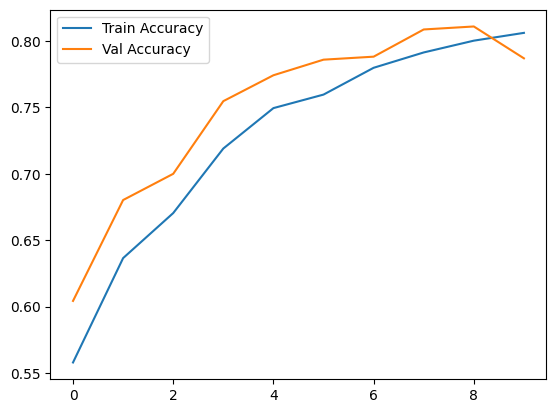

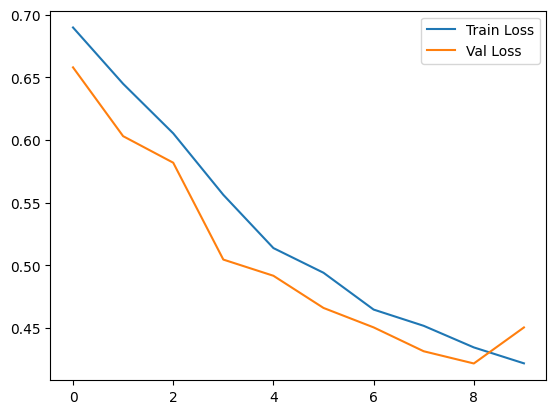

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

In [9]:
model.save('dogs_and_cats_cnn.keras')

In [10]:
from google.colab import files
uploaded = files.upload()

Saving adorable-animal-breed-350428.jpg to adorable-animal-breed-350428.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


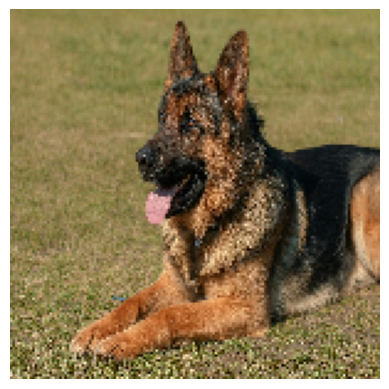

🐶 This is a Dog


In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model("dogs_and_cats_cnn.keras")

# Change filename to the image you uploaded
img_path = list(uploaded.keys())[0]   # first uploaded file

# Preprocess image
img = image.load_img(img_path, target_size=(150, 150))   # same size as training
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0    # normalize

# Prediction
prediction = model.predict(img_array)

# Show result
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis("off")
plt.show()

if prediction[0][0] > 0.5:
    print("🐶 This is a Dog")
else:
    print("🐱 This is a Cat")